# Unit 5 - Financial Planning

In [30]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [31]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [32]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [33]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [34]:
print(btc_url)
print(eth_url)

https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD
https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD


In [35]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44782.80
The current value of your 5.3 ETH is $13809.94


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [36]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [37]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [39]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-09", tz="America/New_York").isoformat() 

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-09 00:00:00-04:00  115.43  115.43  114.97  115.05  3418086  423.18   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-09 00:00:00-04:00  423.26  421.41  421.62  38368598

In [41]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.05
Current SPY closing price: $421.62


In [42]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21081.00
The current value of your 200 AGG shares is $23010.00


### Savings Health Analysis

In [43]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
df_savings = pd.DataFrame([
    my_btc_value + my_eth_value,
    my_agg_value + my_spy_value
],
    columns=["amount"],
    index=["crypto", "shares"]
)

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,amount
crypto,58592.745
shares,44091.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

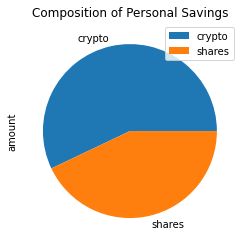

In [48]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [51]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount = df_savings["amount"].sum()
total_amount

# Validate saving health
if total_amount > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_amount == emergency_fund:
    print(f"Oh no! Your savings is even to your emergency fund.")
else:
    print(f"Ops! You don't have enough money in your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [52]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [56]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df


# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [63]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [64]:
# Printing the simulation input data
MC_thirtyyears.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [65]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999287,0.990197,0.990599,1.014455,0.985446,0.999525,1.002753,0.998137,1.008201,0.994489,...,1.011009,0.995337,0.983707,0.997258,1.009723,1.004434,1.002966,1.000315,0.995527,1.003750
2,1.005929,0.979091,0.977895,1.023850,0.971234,0.995170,0.990961,0.993133,1.002844,1.000442,...,1.026879,0.999653,0.986416,0.995396,1.016548,1.011508,1.003392,1.005152,0.990437,1.013735
3,1.003903,0.975227,0.980343,1.018728,0.972438,0.996068,0.983177,0.994181,1.009718,0.999071,...,1.015863,1.017055,0.979176,0.994515,1.007221,1.026876,1.019178,1.011850,0.983786,1.023686
4,1.009949,0.964417,0.975233,1.015533,0.977434,1.004747,0.969635,1.000905,1.021436,1.010166,...,1.015880,1.018302,0.978631,0.990879,1.003075,1.028175,1.025439,1.020036,0.982157,1.025914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,28.429192,13.803550,26.341092,16.185562,22.701879,11.988054,33.035093,9.966287,27.842928,33.423021,...,9.411835,65.844350,9.836295,14.635529,23.479759,14.037022,9.711581,15.872609,22.380837,30.432648
7557,28.495473,13.854260,26.172996,16.310752,22.697656,11.979977,33.105454,9.998534,27.988088,33.674640,...,9.484028,65.507908,9.977300,14.745289,23.689995,13.917020,9.727550,15.985593,22.610886,30.655772
7558,28.034508,13.775367,25.511059,16.371612,22.571150,11.971726,33.253632,10.039259,27.970741,33.677343,...,9.511751,65.939572,9.911759,14.801050,23.794529,13.922338,9.893369,15.860976,22.811074,30.511254
7559,28.461374,13.676336,25.087143,16.406783,22.670238,12.106130,32.983039,10.101895,27.774159,33.335540,...,9.650086,66.270013,9.856115,14.824150,23.830538,13.832210,10.008167,15.728722,22.824096,31.065940


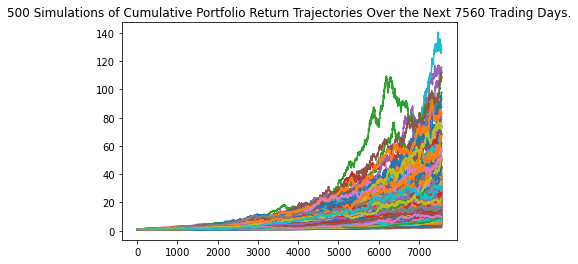

In [66]:
# Plot simulation outcomes
line_plot = MC_thirtyyears.plot_simulation() 

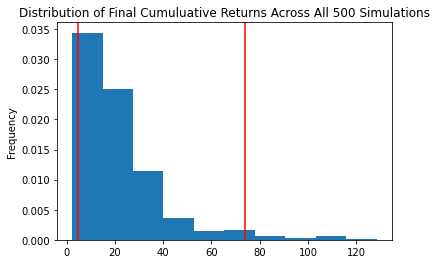

In [67]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyears.plot_distribution() 

### Retirement Analysis

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_thirtyyears.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             22.226232
std              18.322138
min               2.320705
25%              10.488838
50%              16.810828
75%              27.530050
max             128.404602
95% CI Lower      4.582188
95% CI Upper     73.908744
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [70]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $91643.76 and $1478174.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [71]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $137465.65 and $2217262.33


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [78]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [79]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996708,1.005076,1.007267,0.993644,1.010588,1.003840,0.995551,0.998778,1.003796,1.018113,...,1.010469,1.004796,1.018741,0.993992,1.005890,0.990827,0.994822,1.005312,1.009017,0.991151
2,0.994953,1.010612,1.013380,0.982687,1.016896,1.010817,1.012274,1.008621,1.035006,1.010078,...,0.992900,1.001573,1.026602,1.006818,1.000350,0.992730,0.989350,1.000312,1.015893,0.977661
3,0.988764,0.999932,1.010585,0.966910,1.016015,1.020579,0.994449,1.005780,1.042003,1.001484,...,0.988123,0.996591,1.032385,1.001381,0.991197,0.997070,0.988269,0.984942,1.023221,0.978386
4,0.996365,0.997858,1.012575,0.966313,1.027078,1.019067,0.993537,1.011771,1.018725,1.002554,...,0.977434,1.014277,1.025736,0.990127,0.996008,0.999111,0.983076,0.991198,1.032186,0.982503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.751365,1.661997,1.959453,1.481107,0.891275,1.976159,2.643462,0.791567,1.303479,1.725302,...,1.564398,2.560024,1.593412,1.535086,1.590449,0.902342,1.773938,1.712905,1.295819,1.374886
1257,1.754695,1.663791,1.986657,1.494369,0.902149,1.984234,2.677698,0.783747,1.304556,1.722248,...,1.555184,2.539959,1.592649,1.523831,1.574433,0.912360,1.758492,1.726979,1.297417,1.370268
1258,1.727873,1.664346,1.978681,1.475728,0.888763,1.980218,2.695445,0.783166,1.313592,1.733582,...,1.549616,2.538827,1.603510,1.534220,1.564599,0.899122,1.734440,1.742581,1.294640,1.364955
1259,1.737435,1.656459,2.006012,1.462437,0.889440,1.997833,2.660168,0.784423,1.315712,1.741168,...,1.546113,2.556135,1.600056,1.541560,1.564343,0.892278,1.730680,1.716962,1.284179,1.380032


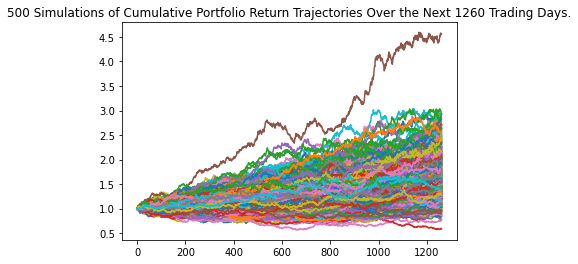

In [80]:
# Plot simulation outcomes
line_plot_five_years = MC_five_years.plot_simulation() 

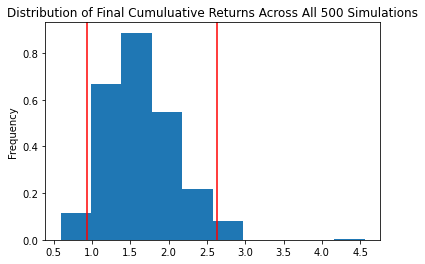

In [81]:
# Plot probability distribution and confidence intervals
dist_plot_five_years = MC_five_years.plot_distribution() 

In [82]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five_years = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five_years)

count           500.000000
mean              1.646482
std               0.457797
min               0.590367
25%               1.327515
50%               1.583652
75%               1.947663
max               4.559045
95% CI Lower      0.935648
95% CI Upper      2.632723
Name: 1260, dtype: float64


In [93]:
# Set initial investment
initial_investment = 20000 * 2

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five_years[8]*initial_investment,2)
ci_upper_five = round(even_tbl_five_years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $37425.9 and $105308.9


### Ten Years Retirement Option

In [87]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [88]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012737,1.002283,1.002662,1.008427,0.986900,1.000220,1.005926,0.997610,1.002988,1.002911,...,1.016865,0.983293,1.004826,1.004395,0.994017,1.001162,1.003925,0.991747,1.014392,1.002679
2,1.013010,1.010020,1.002374,1.012632,0.974851,1.004547,1.008970,0.992515,1.001405,1.006832,...,1.011828,0.987158,1.007386,1.001109,0.989606,0.999070,1.004398,0.999388,1.016867,1.007497
3,1.001095,1.016313,1.004270,1.008269,0.977290,0.990885,1.000262,1.006797,1.006844,0.998994,...,1.020158,0.984268,1.008503,0.996146,1.006339,0.999593,1.010999,0.989232,1.012555,1.010863
4,1.004030,1.010069,0.991978,1.021835,0.960466,0.993333,1.001092,1.006101,0.996637,1.001930,...,1.024211,0.980615,1.004525,1.007236,1.007322,1.018643,0.997022,0.994936,1.010252,1.009466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.721978,2.592387,2.125253,1.452284,4.044854,3.283851,1.834018,2.792157,2.343432,3.015295,...,3.853482,3.313525,3.034652,4.206994,4.399489,4.224627,4.439997,1.581700,2.181299,3.812365
2517,3.698909,2.609467,2.152783,1.467173,4.116281,3.280580,1.865286,2.815089,2.322397,3.036384,...,3.842066,3.317685,3.026765,4.185527,4.430863,4.246586,4.436205,1.582014,2.190926,3.825949
2518,3.725362,2.618310,2.134061,1.477027,4.121176,3.271590,1.868304,2.826189,2.311005,3.086859,...,3.888397,3.334554,3.025671,4.148474,4.475636,4.271483,4.423009,1.555969,2.212521,3.818282
2519,3.755589,2.628023,2.122775,1.457496,4.091386,3.235558,1.875079,2.808327,2.306846,3.100273,...,3.889908,3.342775,3.011525,4.173518,4.436423,4.277167,4.412981,1.558298,2.205323,3.840199


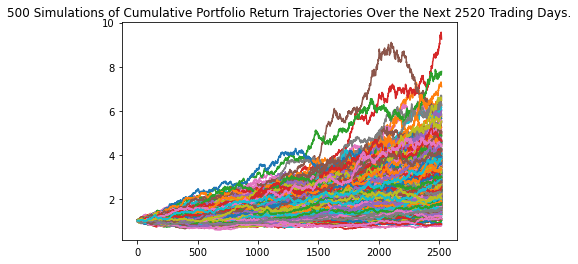

In [89]:
# Plot simulation outcomes
line_plot_ten_years = MC_ten_years.plot_simulation() 

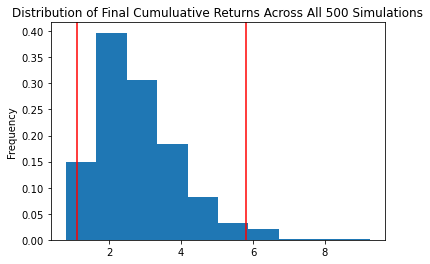

In [90]:
# Plot probability distribution and confidence intervals
dist_plot_ten_years = MC_ten_years.plot_distribution() 

In [91]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten_years = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten_years)

count           500.000000
mean              2.828254
std               1.190279
min               0.797736
25%               1.984665
50%               2.566253
75%               3.508415
max               9.254731
95% CI Lower      1.116424
95% CI Upper      5.799887
Name: 2520, dtype: float64


In [92]:
# Set initial investment
initial_investment = 20000 * 4

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten_years[8]*initial_investment,2)
ci_upper_ten = round(even_tbl_ten_years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $80000 in the portfolio over the next 10 years will end within in the range of $89313.91 and $463990.98
